In [9]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_pickle('all_banks')
display(df.head())
bank_stocks = df

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [19]:
bank_stocks.to_csv('/content/drive/MyDrive/PortfolioProject/bank_stocks.csv', index=True)
print("bank_stocks DataFrame exported to /content/drive/MyDrive/PortfolioProject/bank_stocks.csv")

bank_stocks DataFrame exported to /content/drive/MyDrive/PortfolioProject/bank_stocks.csv


In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

,0
Bank Ticker,
BAC,54.90
C,564.10
GS,247.92
JPM,70.08
MS,89.30
WFC,58.52


In [5]:
returns = pd.DataFrame()

In [6]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [20]:
returns.to_csv('/content/drive/MyDrive/PortfolioProject/returns.csv', index=True)
print("returns DataFrame exported to /content/drive/MyDrive/PortfolioProject/returns.csv")

returns DataFrame exported to /content/drive/MyDrive/PortfolioProject/returns.csv


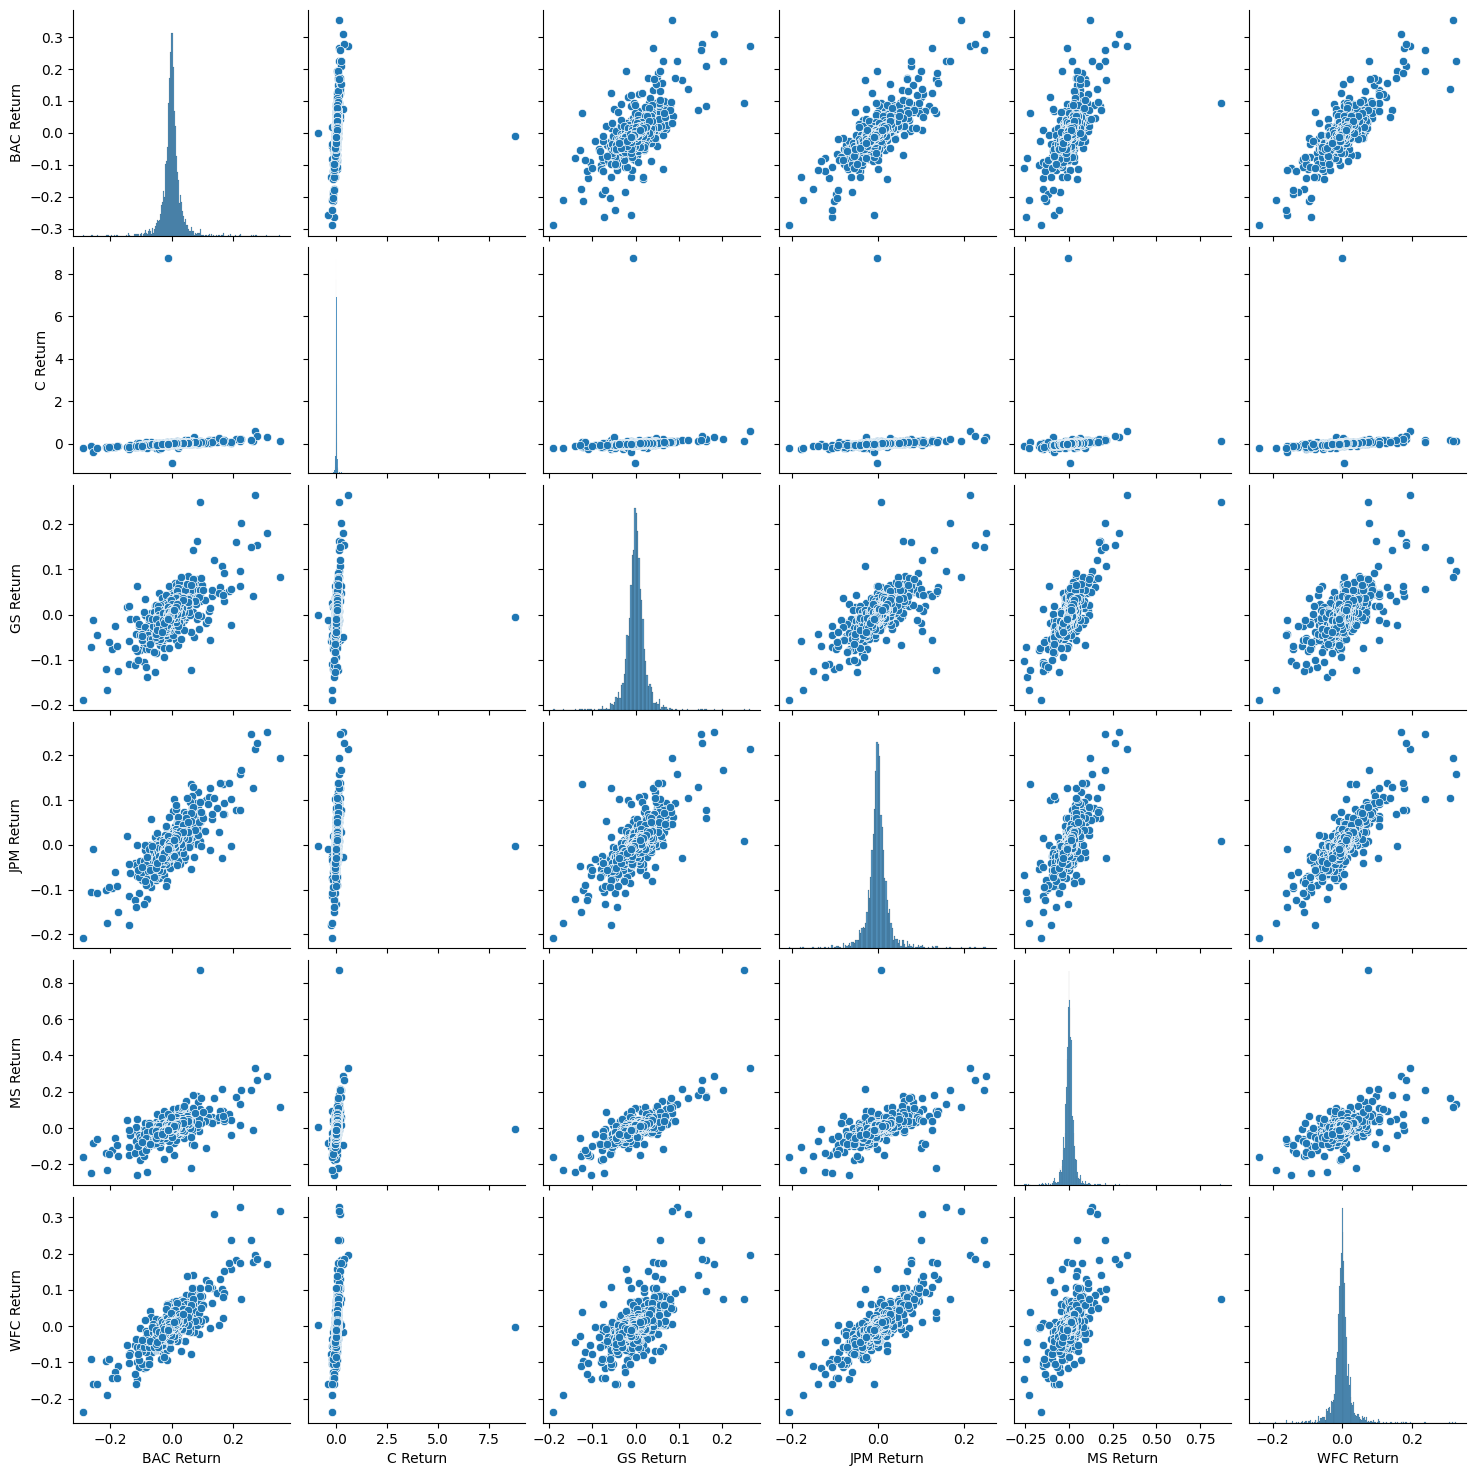

In [10]:
returns[1:]
sns.pairplot(returns[1:])

plt.savefig('/content/drive/MyDrive/PortfolioProject/scatterplots.png')

In [11]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

,0
BAC Return,2009-01-20
C Return,2011-05-06
GS Return,2009-01-20
JPM Return,2009-01-20
MS Return,2008-10-09
WFC Return,2009-01-20


In [12]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

,0
BAC Return,2009-04-09
C Return,2011-05-09
GS Return,2008-11-24
JPM Return,2009-01-21
MS Return,2008-10-13
WFC Return,2008-07-16


In [13]:
returns.std() # Citigroup riskiest

,0
BAC Return,0.036650
C Return,0.179969
GS Return,0.025346
JPM Return,0.027656
MS Return,0.037820
WFC Return,0.030233


In [14]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

,0
BAC Return,0.016163
C Return,0.015289
GS Return,0.014046
JPM Return,0.014017
MS Return,0.016249
WFC Return,0.012591


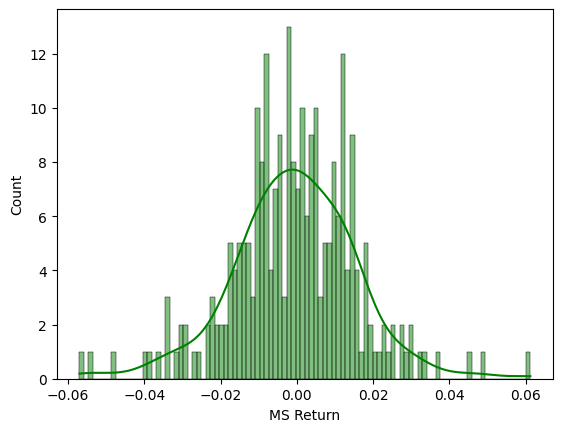

In [15]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=100, kde=True)
plt.savefig('/content/drive/MyDrive/PortfolioProject/ms_return.png')

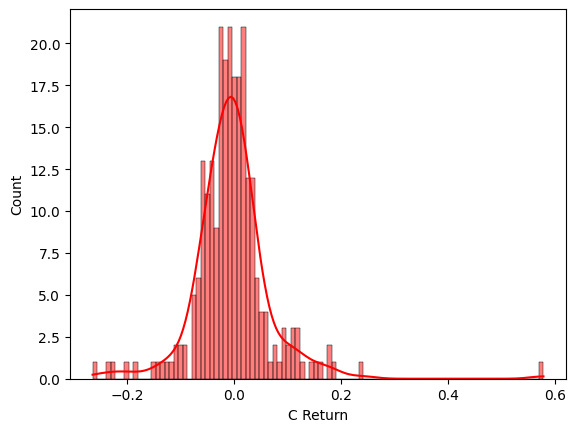

In [16]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100, kde=True)
plt.savefig('/content/drive/MyDrive/PortfolioProject/c_return.png')

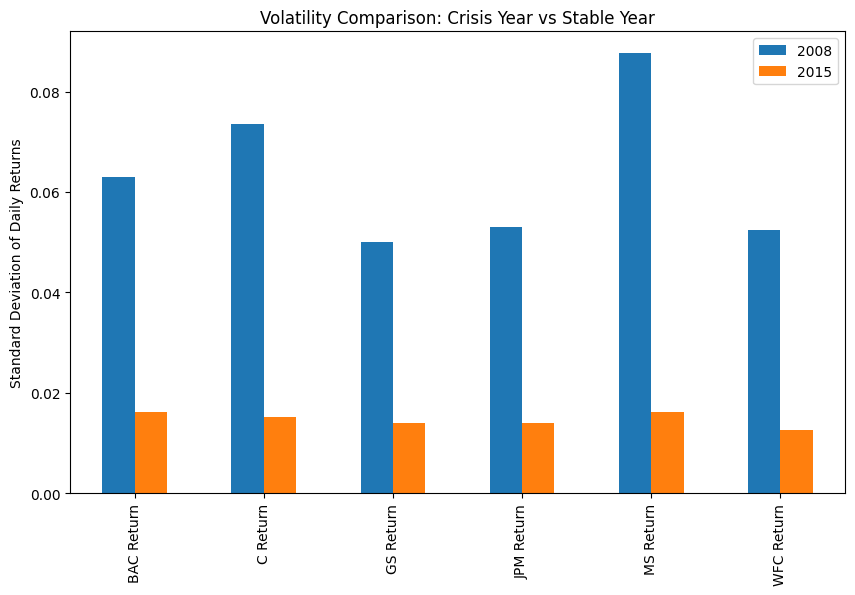

In [18]:
# Volatility comparison
vol_2008 = returns.loc['2008'].std()
vol_2015 = returns.loc['2015'].std()

vol_df = pd.DataFrame({
    '2008': vol_2008,
    '2015': vol_2015
})

vol_df.plot(kind='bar', figsize=(10,6))
plt.title('Volatility Comparison: Crisis Year vs Stable Year')
plt.ylabel('Standard Deviation of Daily Returns')

plt.savefig('/content/drive/MyDrive/PortfolioProject/volatility_comparison.png')
plt.show()